<a href="https://colab.research.google.com/github/pk2971/Mall-Customer-Clustering/blob/main/Mall_customer_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mall customer Clustering using K-Means, DBSCAN and

DBSCAN youtube tutorial :https://www.youtube.com/watch?v=C3r7tGRe2eI

Data source:https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv


In [1]:
import pandas as pd
import io
import csv


In [2]:
df=pd.read_csv("/content/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
X=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Using the elbow visualizer to find the number of clusters needed for the algorithm

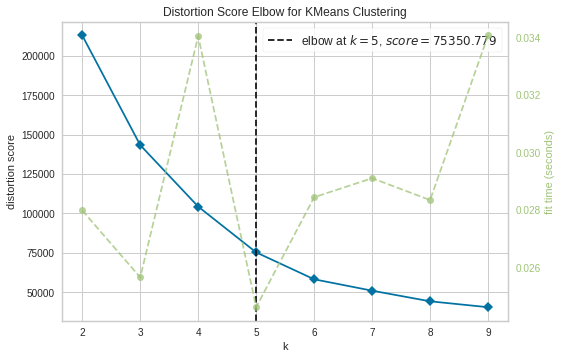

In [10]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans 


model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.show()
#plt.show()

We will use 5 and 6 as the number of clsuters needed while fitting the model.

In [16]:
kmeans5=KMeans(n_clusters=5,init='k-means++',random_state=42).fit(X)
#kmeans5.fit(X)
kmeans5.labels_
kmeans5Visualize=X.copy()
kmeans5Visualize.loc[:,'Cluster']=kmeans5.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


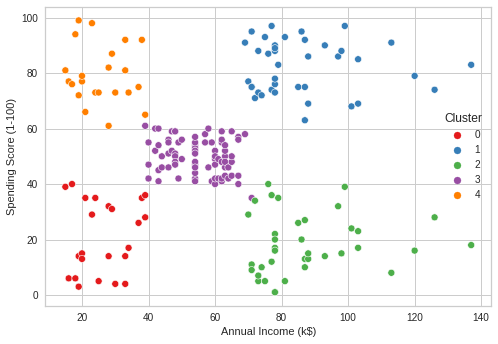

In [19]:
import seaborn as sns
scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=kmeans5Visualize,
                hue='Cluster', palette='Set1', legend='full')



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


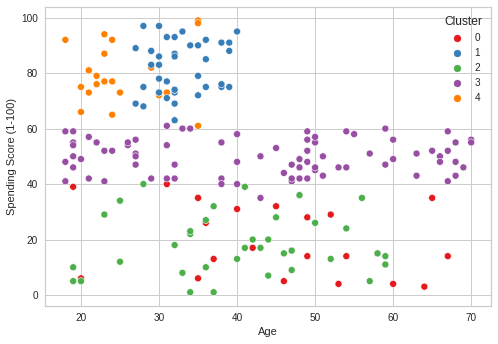

In [20]:
scat_2 = sns.scatterplot('Age', 'Spending Score (1-100)', data=kmeans5Visualize,
                hue='Cluster', palette='Set1', legend='full')